<a href="https://colab.research.google.com/github/Jit562/ML_Bike_rental_predication/blob/main/Rental_Bike_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Seoul Bike Sharing Demand Prediction

## Problem Description

Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

## Data Description
The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.

## Attribute Information:



*   Date : year-month-day
*   Rented Bike count - Count of bikes rented at each hour
*   Hour - Hour of he day
*   Temperature-Temperature in Celsius
*   Humidity - %
*   Windspeed - m/s
*   Visibility - 10m
*   Dew point temperature - Celsius
*   Solar radiation - MJ/m2
*   Rainfall - mm
*   Snowfall - cm
*   Seasons - Winter, Spring, Summer, Autumn
*   Holiday - Holiday/No holiday
*   Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)



## Import Dependancy

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

from sklearn.linear_model import Lasso, Ridge, ElasticNet # Handle Overfiting Problems
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error,mean_absolute_percentage_error # Handle Error

import math

from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler  # dataset preprocess for numerical dataset
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder # for categorical dataset


from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import VotingRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate, cross_val_score, cross_val_predict


from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline, Pipeline

## Load Dataset

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/SeoulBikeData.csv', encoding = 'unicode_escape')
df.sample(5) # remdom check data

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
7176,26/09/2018,880,0,17.0,51,1.5,2000,6.7,0.0,0.0,0.0,Autumn,No Holiday,Yes
2045,24/02/2018,58,5,1.8,84,2.7,214,-0.6,0.0,0.0,0.0,Winter,No Holiday,Yes
8570,23/11/2018,279,2,-1.0,43,3.1,2000,-12.0,0.0,0.0,0.0,Autumn,No Holiday,Yes
7853,24/10/2018,164,5,8.5,87,1.2,1046,6.4,0.0,0.0,0.0,Autumn,No Holiday,Yes
5183,04/07/2018,1432,23,24.7,74,1.4,1596,19.7,0.0,0.0,0.0,Summer,No Holiday,Yes


## Check the basic information of the dataset

In [5]:
df.head() # check top 5 dataset

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [6]:
df.tail() # check below 5 data

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [7]:
df.info() #check data type and null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [9]:
df.shape # check howmany row and columns in the dataset

(8760, 14)

In [10]:
df.describe() # check data destribution

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


## Exploratory Data Analysis (EDA)

In [11]:
df.isnull().sum() # check dataset Null values

,0
Date,0
Rented Bike Count,0
Hour,0
Temperature(°C),0
Humidity(%),0
Wind speed (m/s),0
Visibility (10m),0
Dew point temperature(°C),0
Solar Radiation (MJ/m2),0
Rainfall(mm),0




*   So according to data we do not have any null value.

*   Rented Bike Count column is dependent column and rest columns are independant columns.
*   We have four object columns six float columns and four int columns.



In [13]:
df.duplicated().sum() # check Dupliicated values

0

In [14]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [17]:
seasons_counts = df['Seasons'].value_counts().reset_index()
seasons_counts

,Seasons,count
0,Spring,2208
1,Summer,2208
2,Autumn,2184
3,Winter,2160


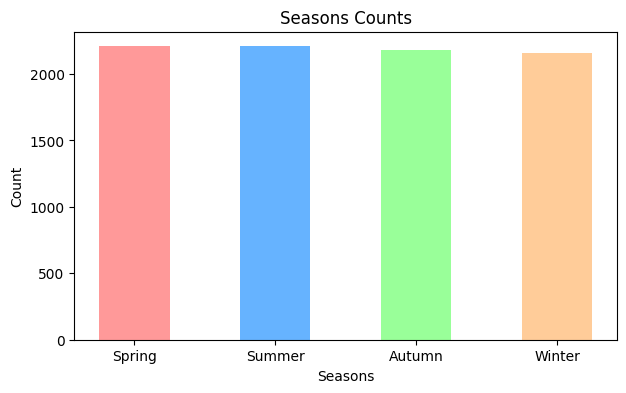

In [38]:
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
plt.figure(figsize=(7,4))
plt.bar(seasons_counts['Seasons'], seasons_counts['count'], width=0.5, color=colors)
plt.title('Seasons Counts')
plt.xlabel('Seasons')
plt.ylabel('Count')
plt.show()

In [41]:

season_vs_rent_bike = (df.groupby('Seasons')['Rented Bike Count'].sum().reset_index()).sort_values(by='Rented Bike Count', ascending=False)
season_vs_rent_bike

,Seasons,Rented Bike Count
2,Summer,2283234
0,Autumn,1790002
1,Spring,1611909
3,Winter,487169


## Distribution of Bike Rentals by Season

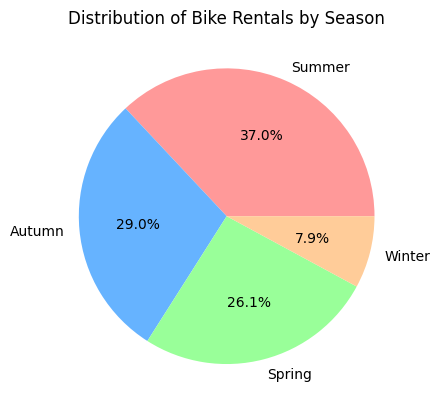

In [44]:
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
plt.pie(season_vs_rent_bike['Rented Bike Count'], labels=season_vs_rent_bike['Seasons'], autopct='%1.1f%%', colors=colors)
_ = plt.title('Distribution of Bike Rentals by Season')

In [46]:
df['Holiday'].value_counts().reset_index()

,Holiday,count
0,No Holiday,8328
1,Holiday,432


## Distribution of Bike Rentals by Holiday

In [47]:
holiday_bike_rent = (df.groupby('Holiday')['Rented Bike Count'].sum().reset_index()).sort_values(by='Rented Bike Count', ascending=False)
holiday_bike_rent

,Holiday,Rented Bike Count
1,No Holiday,5956419
0,Holiday,215895


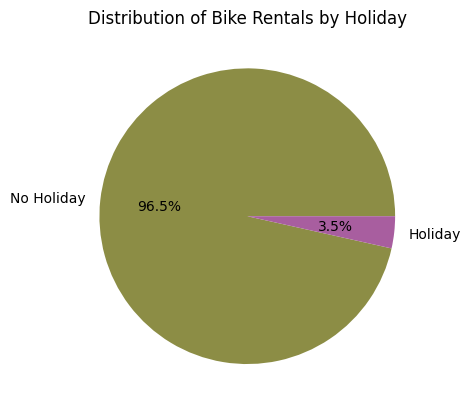

In [52]:
colors = ['#8c8d45','#a85e9f']
plt.pie(holiday_bike_rent['Rented Bike Count'], labels=holiday_bike_rent['Holiday'], autopct='%1.1f%%', colors=colors)
_ = plt.title('Distribution of Bike Rentals by Holiday')

# Distribution of Bike Rentals by Holiday vs Season

In [57]:
holiday_season_bike_rent = df.groupby(['Holiday', 'Seasons'])['Rented Bike Count'].sum().unstack()
holiday_season_bike_rent

Seasons,Autumn,Spring,Summer,Winter
Holiday,,,,
Holiday,91018,45742,49063,30072
No Holiday,1698984,1566167,2234171,457097


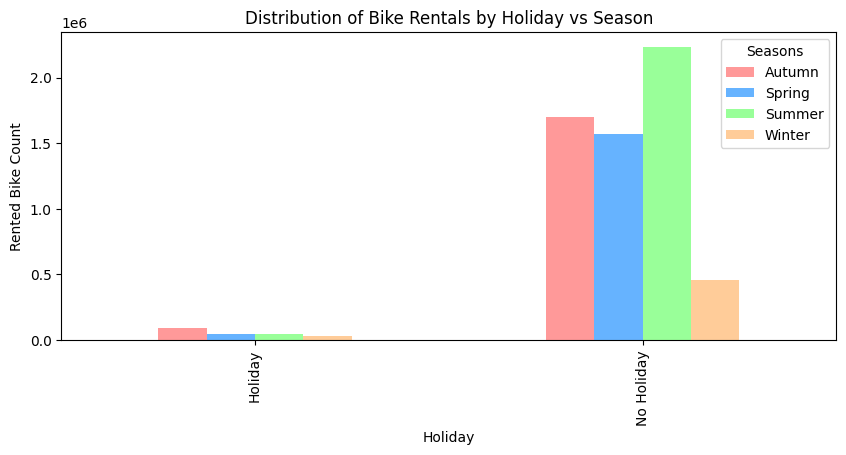

In [62]:
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
holiday_season_bike_rent.plot(kind='bar', figsize=(10,4), color=colors)
plt.title('Distribution of Bike Rentals by Holiday vs Season')
plt.xlabel('Holiday')
plt.ylabel('Rented Bike Count')
plt.show()

## Relationship b/w seasons humidity and bike count

In [63]:
session_hum_bike_count = df.groupby('Seasons') \
    .agg(avg_humidity = ('Humidity(%)','mean'),\
         max_humidity = ('Humidity(%)','max'),\
         min_humidity = ('Humidity(%)','min')).reset_index()

session_hum_bike_count

,Seasons,avg_humidity,max_humidity,min_humidity
0,Autumn,59.228480,97,13
1,Spring,58.776721,98,0
2,Summer,64.981431,98,21
3,Winter,49.744907,97,14


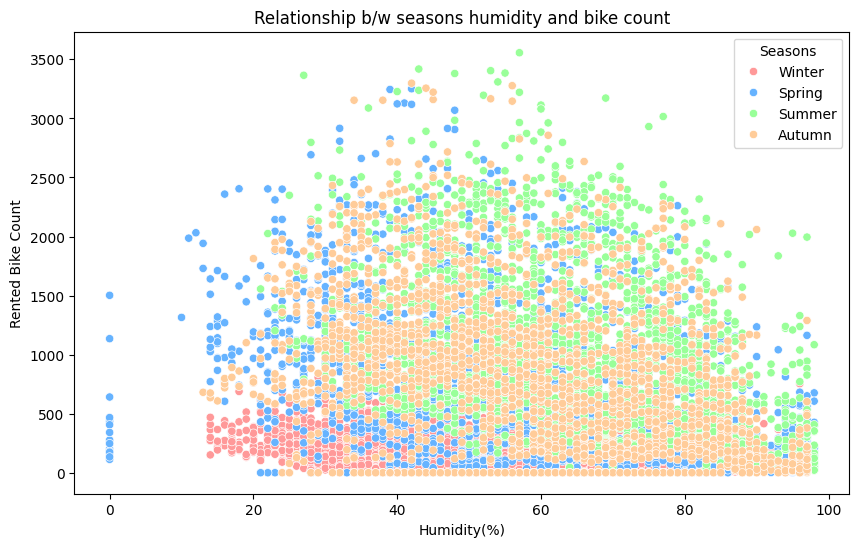

In [66]:
plt.figure(figsize=(10,6))
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
sns.scatterplot(x='Humidity(%)', y='Rented Bike Count', data=df, hue='Seasons', palette=colors)
plt.title('Relationship b/w seasons humidity and bike count')
plt.show()

## Temperature, Rented Bike Count for diffrent Seasons

In [68]:
session_temp_bike_count = df.groupby('Seasons') \
    .agg(avg_humidity = ('Temperature(°C)','mean'),\
         max_humidity = ('Temperature(°C)','max'),\
         min_humidity = ('Temperature(°C)','min')).reset_index()

session_temp_bike_count

,Seasons,avg_humidity,max_humidity,min_humidity
0,Autumn,14.120833,30.5,-3.0
1,Spring,13.046694,29.4,-6.6
2,Summer,26.582790,39.4,16.3
3,Winter,-2.540463,10.3,-17.8


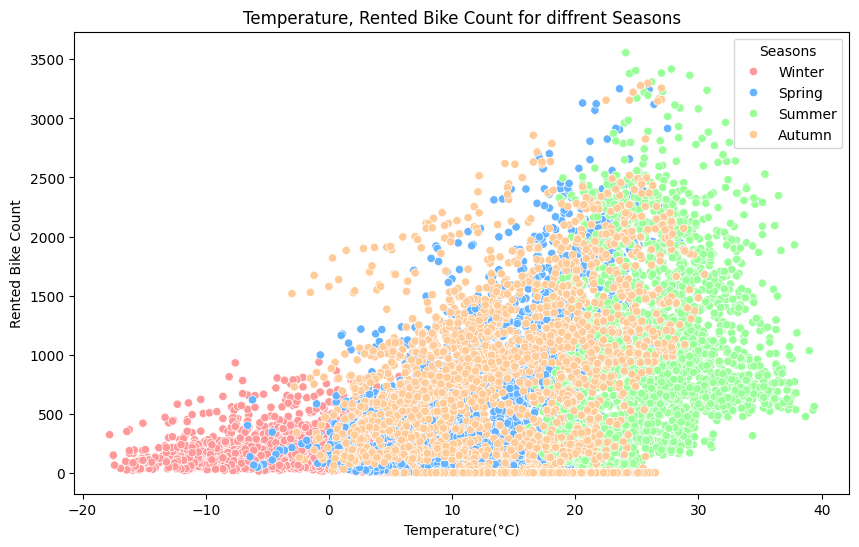

In [69]:
plt.figure(figsize=(10,6))
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
sns.scatterplot(x='Temperature(°C)', y='Rented Bike Count', data=df, hue='Seasons', palette=colors)
plt.title('Temperature, Rented Bike Count for diffrent Seasons')
plt.show()

## Hour, Rented Bike Count for diffrent Seasons

In [71]:
hour_season_rent_bike = df.groupby(['Hour','Seasons'])['Rented Bike Count'].sum().unstack()
hour_season_rent_bike

Seasons,Autumn,Spring,Summer,Winter
Hour,,,,
0,56755,43298,82714,14866
1,44200,32755,64287,14315
2,30198,22767,46529,10601
3,20524,15163,31526,7003
4,13522,9740,20591,4543
5,13073,10456,22626,4610
6,28759,23151,44697,8354
7,63899,55376,83056,18861
8,108948,93274,130511,37998


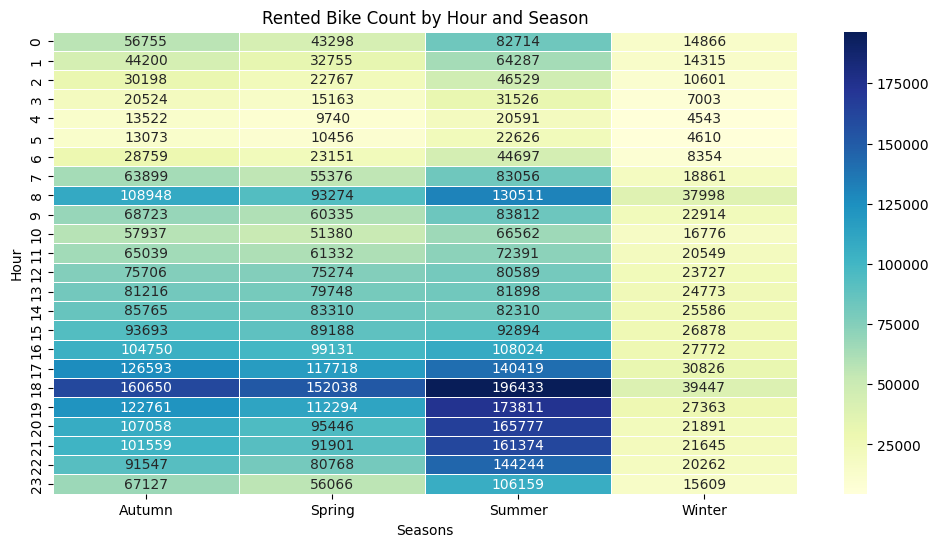

In [72]:
# Create heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(hour_season_rent_bike, annot=True, fmt='d', cmap='YlGnBu', linewidths=.5)
plt.title('Rented Bike Count by Hour and Season')
plt.xlabel('Seasons')
plt.ylabel('Hour')
plt.show()

## Hour, Rented Bike Count for diffrent Seasons on holiday

In [75]:
holiday = df[df['Holiday'] == 'Holiday'].groupby('Hour')['Rented Bike Count'].sum().reset_index()
holiday

,Hour,Rented Bike Count
0,0,8391
1,1,7080
2,2,5470
3,3,3822
4,4,2311
5,5,1602
6,6,2391
7,7,3857
8,8,6273
9,9,6826


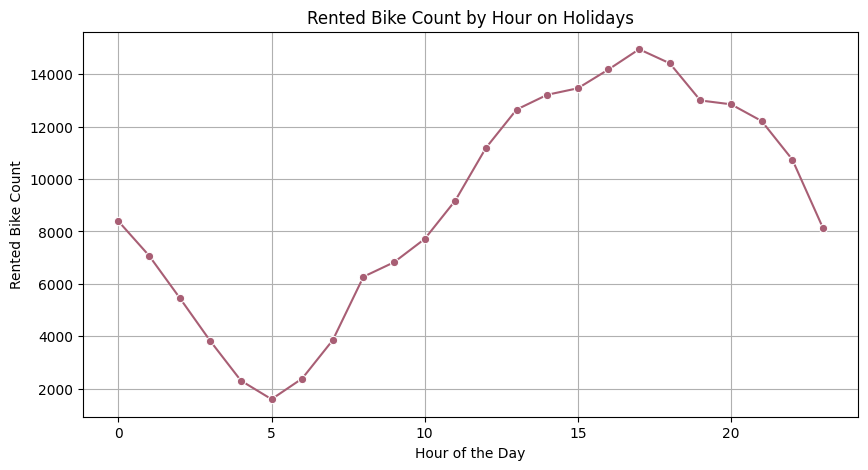

In [80]:
# Create line plot
plt.figure(figsize=(10, 5))
sns.lineplot(data=holiday, x='Hour', y='Rented Bike Count', marker='o', color='#a85e74')

# Add labels and title
plt.xlabel('Hour of the Day')
plt.ylabel('Rented Bike Count')
plt.title('Rented Bike Count by Hour on Holidays')
plt.grid(True)

# Show plot
plt.show()

# Hour, Rented Bike Count for diffrent Seasons on Not holiday

In [81]:
not_holiday = df[df['Holiday'] == 'No Holiday'].groupby('Hour')['Rented Bike Count'].sum().reset_index()
not_holiday

,Hour,Rented Bike Count
0,0,189242
1,1,148477
2,2,104625
3,3,70394
4,4,46085
5,5,49163
6,6,102570
7,7,217335
8,8,364458
9,9,228958


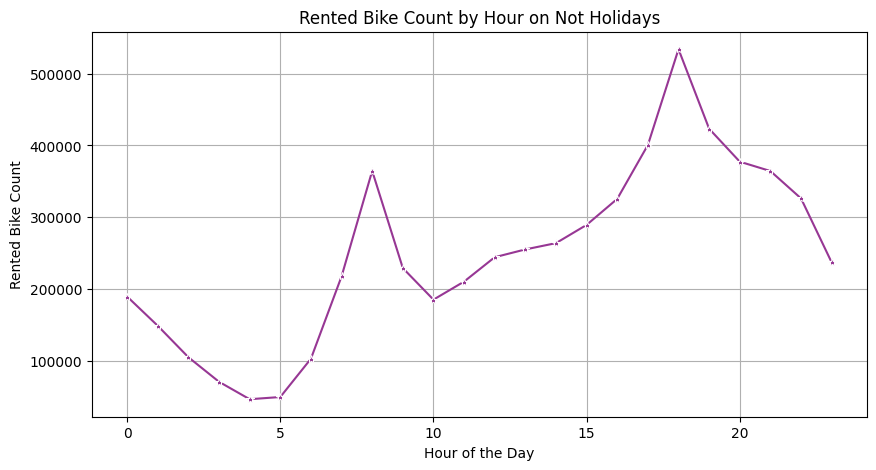

In [88]:
# Create line plot
plt.figure(figsize=(10, 5))
sns.lineplot(data=not_holiday , x='Hour', y='Rented Bike Count', marker='*', color='#973794')

# Add labels and title
plt.xlabel('Hour of the Day')
plt.ylabel('Rented Bike Count')
plt.title('Rented Bike Count by Hour on Not Holidays')
plt.grid(True)

# Show plot
plt.show()

## Wind speed, Rented Bike Count for diffrent Seasons

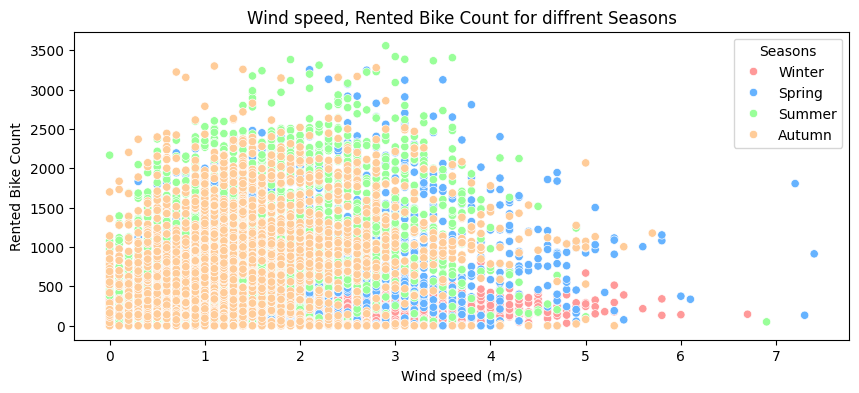

In [89]:
plt.figure(figsize=(10,4))
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
sns.scatterplot(x = 'Wind speed (m/s)', y = 'Rented Bike Count', data = df, hue = 'Seasons', palette = colors)
plt.title('Wind speed, Rented Bike Count for diffrent Seasons')
plt.show()

## Visibility (10m), Rented Bike Count for diffrent Seasons

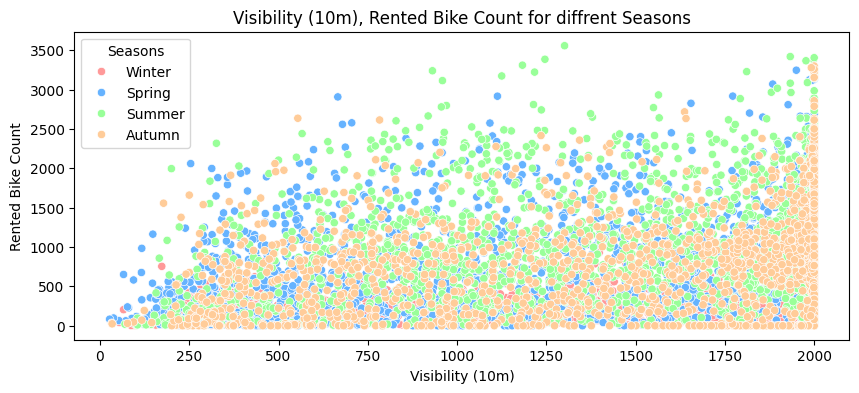

In [91]:
plt.figure(figsize=(10,4))
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
sns.scatterplot(x = 'Visibility (10m)', y = 'Rented Bike Count', data = df, hue = 'Seasons', palette = colors)
plt.title('Visibility (10m), Rented Bike Count for diffrent Seasons')
plt.show()

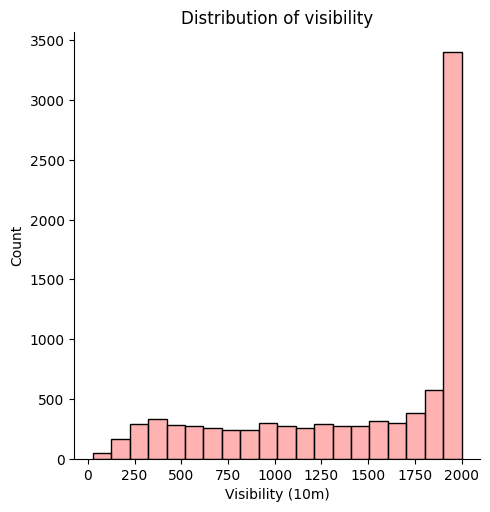

In [97]:
sns.displot(df['Visibility (10m)'], color='#ff9999')
plt.title('Distribution of visibility')
plt.show()

## RainFall Rented Bike ditribution by season

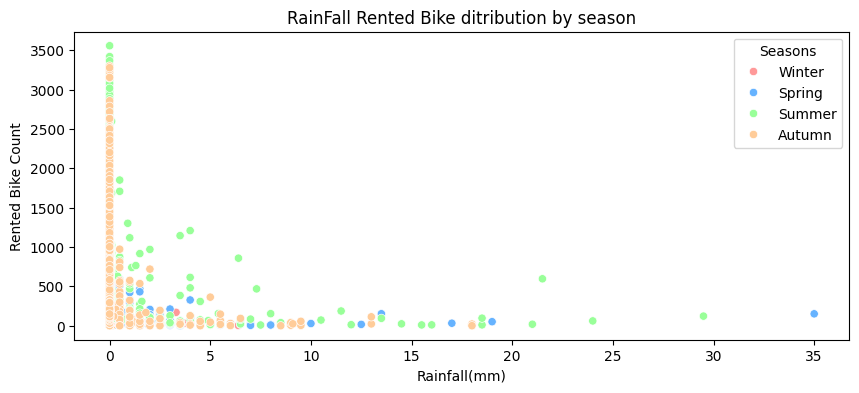

In [98]:
plt.figure(figsize=(10,4))
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
sns.scatterplot(x = 'Rainfall(mm)', y = 'Rented Bike Count', data = df, hue = 'Seasons', palette = colors)
plt.title('RainFall Rented Bike ditribution by season')
plt.show()

## SnowFall Rented Bike ditribution by season

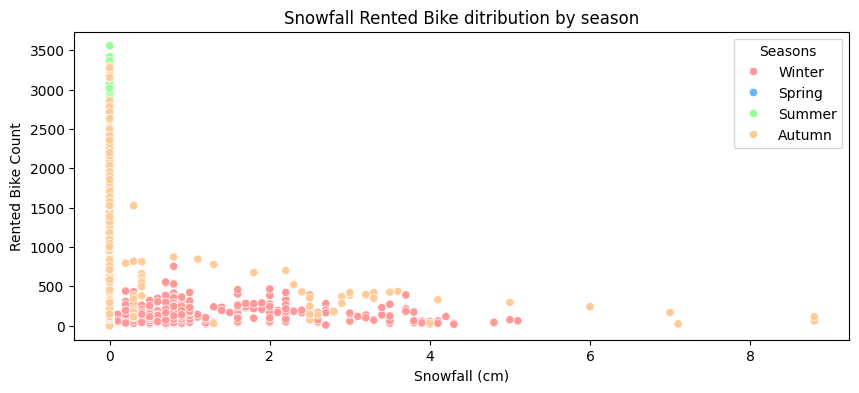

In [100]:
plt.figure(figsize=(10,4))
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
sns.scatterplot(x = 'Snowfall (cm)', y = 'Rented Bike Count', data = df, hue = 'Seasons', palette = colors)
plt.title('Snowfall Rented Bike ditribution by season')
plt.show()

## Solar Radiation (MJ/m2) Rented Bike ditribution by season

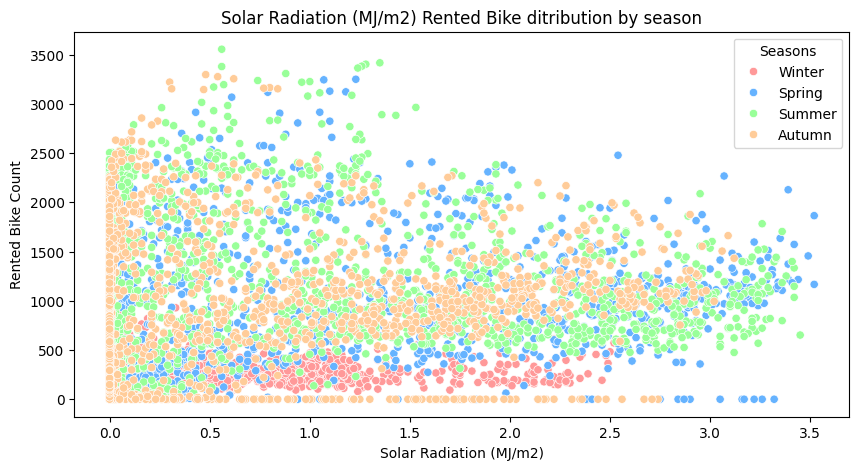

In [103]:
plt.figure(figsize=(10,5))
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
sns.scatterplot(x = 'Solar Radiation (MJ/m2)', y = 'Rented Bike Count', data = df, hue = 'Seasons', palette = colors)
plt.title('Solar Radiation (MJ/m2) Rented Bike ditribution by season')
plt.show()

## Dew point temperature(°C) Rented Bike ditribution by season

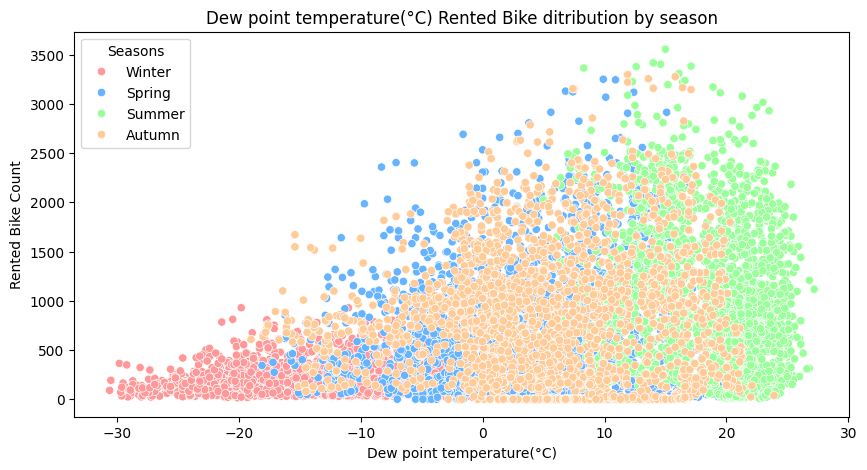

In [104]:
plt.figure(figsize=(10,5))
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
sns.scatterplot(x = 'Dew point temperature(°C)', y = 'Rented Bike Count', data = df, hue = 'Seasons', palette = colors)
plt.title('Dew point temperature(°C) Rented Bike ditribution by season')
plt.show()

## Functional days

In [109]:
fun_day = df['Functioning Day'].value_counts().reset_index()
fun_day

,Functioning Day,count
0,Yes,8465
1,No,295


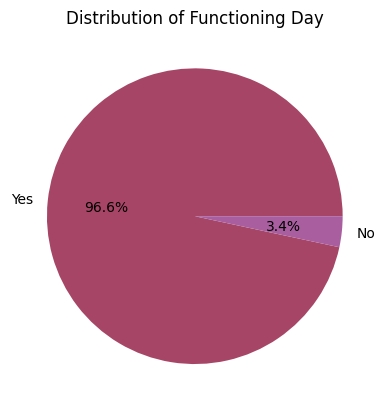

In [111]:
colors = ['#a64566','#a85e9f']
plt.pie(fun_day['count'], labels=fun_day['Functioning Day'], autopct='%1.1f%%', colors=colors)
_ = plt.title('Distribution of Functioning Day')

## Total Rented Bike Count by Season on Functioning Days

In [117]:
yes_fun_day_bike_rent = df[df['Functioning Day'] == 'Yes'].groupby('Seasons')['Rented Bike Count'].sum().reset_index()
yes_fun_day_bike_rent

,Seasons,Rented Bike Count
0,Autumn,1790002
1,Spring,1611909
2,Summer,2283234
3,Winter,487169


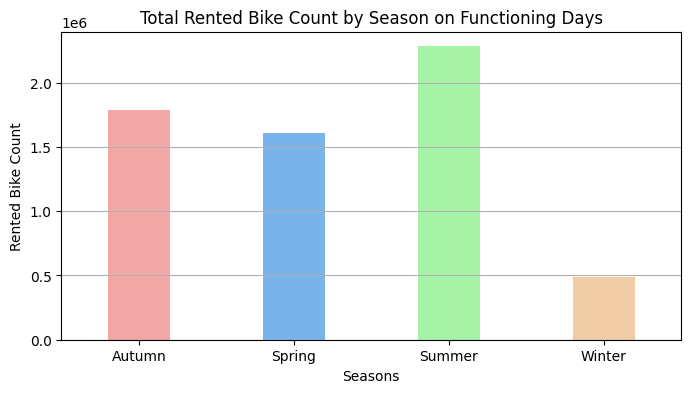

In [122]:
# Create bar plot
plt.figure(figsize=(8, 4))
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
sns.barplot(data=yes_fun_day_bike_rent, x='Seasons', y='Rented Bike Count', palette=colors, width=0.4)

# Add labels and title
plt.xlabel('Seasons')
plt.ylabel('Rented Bike Count')
plt.title('Total Rented Bike Count by Season on Functioning Days')
plt.grid(axis='y')

# Show plot
plt.show()

In [114]:
no_fun_day_bike_rent = df[df['Functioning Day'] == 'No'].groupby('Seasons')['Rented Bike Count'].sum().reset_index()
no_fun_day_bike_rent

,Seasons,Rented Bike Count
0,Autumn,0
1,Spring,0


In [123]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

## Date convert objects to date formate

In [129]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

In [134]:
df['Date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 8760 entries, 0 to 8759
Series name: Date
Non-Null Count  Dtype         
--------------  -----         
8760 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 68.6 KB


In [135]:
df['Date'].dtypes

dtype('<M8[ns]')

## Years

In [160]:
df['year'] = df['Date'].dt.year
df['year'].value_counts().reset_index()

,year,count
0,2018,8016
1,2017,744


## Month and Month name

In [162]:
df['month'] = df['Date'].dt.month
(df['month'].value_counts().reset_index()).sort_values(by='month', ascending=True)

,month,count
1,1,744
11,2,672
2,3,744
7,4,720
3,5,744
8,6,720
4,7,744
5,8,744
9,9,720
6,10,744


## Month name

In [164]:
df['month_name'] = df['Date'].dt.month_name()
(df['month_name'].value_counts().reset_index()).sort_values(by='month_name', ascending=True)

,month_name,count
7,April,720
5,August,744
0,December,744
11,February,672
1,January,744
4,July,744
8,June,720
2,March,744
3,May,744
10,November,720


## Week Days name

In [165]:
df['week_day']  = df['Date'].dt.day_name()
df['week_day'].value_counts().reset_index()

,week_day,count
0,Friday,1272
1,Saturday,1248
2,Sunday,1248
3,Monday,1248
4,Tuesday,1248
5,Wednesday,1248
6,Thursday,1248


## Week days

In [166]:
df['weeks'] = df['Date'].dt.weekday
df['weeks'].value_counts().reset_index()

,weeks,count
0,4,1272
1,5,1248
2,6,1248
3,0,1248
4,1,1248
5,2,1248
6,3,1248


## Month days

In [167]:
df['monthssday'] = df['Date'].dt.days_in_month
df['monthssday'].value_counts().reset_index()

,monthssday,count
0,31,5208
1,30,2880
2,28,672


# days

In [168]:
df['days'] = df['Date'].dt.day
df['days'].value_counts().reset_index()

,days,count
0,1,288
1,2,288
2,28,288
3,27,288
4,26,288
5,25,288
6,24,288
7,23,288
8,22,288
9,21,288


## Years Querter

In [169]:
df['querter'] = df['Date'].dt.quarter
df['querter'].value_counts().reset_index()

,querter,count
0,4,2208
1,3,2208
2,2,2184
3,1,2160
